# Model Evaluation & Hyperparameter Tuning

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [42]:
df1 = pd.read_csv('employee_data_scaled.csv')

In [43]:
df1

,EmployeeNumber,Attrition_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,8,0,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,1,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:

df2 = df1.corr()

In [45]:
df2.loc['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.094361
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
JobRole_Laboratory Tech              0.059511
JobRole_Research scntist             0.059511
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
IsMale                               0.028681
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.014940
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.004254
HourlyRate                        

In [46]:
df1['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [47]:
sm_model = sm.OLS(df1['Attrition_Yes'],df1.drop(['Attrition_Yes'],axis=1))
sm_model1= sm_model.fit()
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     10.12
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.18e-64
Time:                        16:38:30   Log-Likelihood:                -391.14
No. Observations:                1470   AIC:                             884.3
Df Residuals:                    1419   BIC:                             1154.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
EmployeeNumber                    -5.553e-06   1.42e-05     -0.390      0.696   -3.35e-05    2.23e-05
Age                                  -0.1456      0.056     -2.612      0.009      -0.255      -0.036
DailyRate                            -0.0353      0.030     -1.193      0.233      -0.093       0.023
DistanceFromHome                      0.1028      0.029      3.509      0.000       0.045       0.160
Education                             0.0060      0.034      0.177      0.860      -0.061       0.073
EnvironmentSatisfaction              -0.1202      0.023     -5.137      0.000      -0.166      -0.074
HourlyRate                           -0.0147      0.029     -0.501      0.617      -0.072       0.043
JobInvolvement                       -0.1726      0.036     -4.805      0.000      -0.243      -0.102
JobLevel                             -0.0048      0.110     -0.043      0.966      -0.221       0.211
JobSatisfaction                      -0.1107      0.023     -4.782      0.000      -0.156      -0.065
NumCompaniesWorked                    0.1544      0.034      4.510      0.000       0.087       0.222
PercentSalaryHike                    -0.0320      0.051     -0.622      0.534      -0.133       0.069
PerformanceRating                     0.0202      0.037      0.545      0.586      -0.053       0.093
RelationshipSatisfaction             -0.0683      0.024     -2.881      0.004      -0.115      -0.022
StockOptionLevel                     -0.0502      0.041     -1.225      0.221      -0.130       0.030
TotalWorkingYears                    -0.1409      0.096     -1.462      0.144      -0.330       0.048
TrainingTimesLastYear                -0.0799      0.040     -2.003      0.045      -0.158      -0.002
WorkLifeBalance                      -0.0919      0.036     -2.541      0.011      -0.163      -0.021
YearsAtCompany                        0.2214      0.120      1.848      0.065      -0.014       0.457
YearsInCurrentRole                   -0.1664      0.070     -2.388      0.017      -0.303      -0.030
YearsSinceLastPromotion               0.1627      0.052      3.157      0.002       0.062       0.264
YearsWithCurrManager                 -0.1631      0.067     -2.420      0.016      -0.295      -0.031
MonthlyRate                           0.0105      0.030      0.354      0.723      -0.048       0.069
MonthlyIncome                        -0.0078      0.132     -0.059      0.953      -0.267       0.251
BusinessTravel_Non-Travel             0.0644      0.026      2.436      0.015       0.013       0.116
BusinessTravel_Travel_Frequently      0.2173      0.024      9.196      0.000       0.171       0.264
BusinessTravel_Travel_Rarely          0.1292      0.020      6.390      0.000       0.090       0.169
Department_Human Resour

# Splitting data into train and Test

In [48]:
X = df1.drop(['Attrition_Yes'],axis=1)
y = df1['Attrition_Yes']

In [49]:
X

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,5,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,8,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [50]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [51]:
X.iloc[293:]

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
293,407,0.428571,0.332140,0.607143,0.75,0.666667,0.728571,1.000000,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
294,408,0.785714,0.858984,0.035714,0.50,1.000000,0.771429,0.000000,0.25,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
295,410,0.547619,0.166070,0.035714,0.75,1.000000,0.828571,0.666667,0.75,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
296,411,0.000000,0.508232,0.321429,0.50,1.000000,0.557143,0.333333,0.00,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
297,412,0.238095,0.983536,0.535714,0.25,0.333333,0.542857,1.000000,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [185]:
## StratifiedKFold (Testing out StratifiedKFold )

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_logistic = []
scores_svm = []
scores_rf = []
scores_xgb =[]

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],y.loc[train_index], y.loc[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    #scores_xgb.append(get_score())

# KFold
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5)
#for train_index, test_index in kf.split(X,y):
#    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],y.loc[train_index], y.loc[test_index]

In [170]:
scores_logistic,scores_svm,scores_rf

([0.9081632653061225,
  0.8809523809523809,
  0.8707482993197279,
  0.8775510204081632,
  0.8843537414965986],
 [0.8367346938775511,
  0.8367346938775511,
  0.7482993197278912,
  0.826530612244898,
  0.8401360544217688],
 [0.8537414965986394,
  0.8469387755102041,
  0.8741496598639455,
  0.8605442176870748,
  0.8503401360544217])

In [104]:
from sklearn.model_selection import train_test_split

In [168]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score
import warnings

In [114]:
warnings.filterwarnings("ignore")

In [115]:
cross_val_score(LogisticRegression(), X_train, y_train,cv=5)

array([0.8940678 , 0.89787234, 0.87234043, 0.87234043, 0.87234043])

In [116]:
cross_val_score(SVC(),  X_train, y_train,cv=5)

array([0.83898305, 0.84255319, 0.84255319, 0.84255319, 0.84255319])

In [118]:
cross_val_score(RandomForestClassifier(), X, y,cv=5)

array([0.84693878, 0.86054422, 0.85714286, 0.85714286, 0.86054422])

Based on this cross val score, Logistic Regression has the better score

# Hyper parameter tuning

In [122]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [201]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver' : ['lbfgs','liblinear'],
            'C': [0.01,0.1,1,5,10],
            'penalty' : ['l2']
        }
    },
    'XGBoost_Classifier' : {
        'model': XGBClassifier(),
        'params': {
            'learning_rate' : [0.001,0.1,1],
            'n_estimators' : [100,500,1000],
            'max_depth' : [5,10]
        }
    }
}

In [123]:
## GridSearch CV

scores = []

for model_name, model_p in model_params.items():
    clf =  GridSearchCV(model_p['model'], model_p['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.885200,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.848640,{'n_estimators': 10}
2,logistic_regression,0.886051,{'C': 10}


In [ ]:
## RandomSearch CV
scores_rs=[]

for model_name, model_p in model_params.items():
    clf1 =  RandomizedSearchCV(model_p['model'], model_p['params'], cv=5, n_iter = 50,random_state=0)
    clf1.fit(X_train, y_train)
    scores_rs.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

__Logistic Regression shows better score than other models__

## Balancing the dataset


In [172]:
from imblearn.combine import SMOTETomek

In [173]:
df1['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [189]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_train,y_train=smk.fit_sample(X_train, y_train)

# Model Building

In [175]:
lr = LogisticRegression(C=10)

In [190]:
lr.fit(X_train, y_train)

LogisticRegression(C=10)

In [191]:
y_pred = lr.predict(X_test)

In [178]:

y_pred1 = lr.predict_proba(X_test)[:,1]  # all rows, column 1
y_pred2 = [0 for i in range(len(y_test))]

# Evaluation Metrics

In [152]:
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score,roc_curve, roc_auc_score

In [192]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       247
           1       0.43      0.74      0.54        47

    accuracy                           0.80       294
   macro avg       0.69      0.78      0.71       294
weighted avg       0.86      0.80      0.82       294



In [180]:
print (confusion_matrix(y_test,y_pred))

[[200  47]
 [ 12  35]]


In [134]:
average_precision_score(y_test, y_pred)

0.34303721488595434

In [181]:
average_precision_score(y_test, y_pred)

0.35866790930175907

In [136]:
# Compute ROC curve
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


True Positives: 15
False Positives: 5
True Negatives: 238
False Negatives: 36


In [182]:
# Compute ROC curve
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


True Positives: 35
False Positives: 47
True Negatives: 200
False Negatives: 12


__True Postive Rate(sensitivity)__
tpr = tp/(tp+fn)

__False Positive Rate(1- specificity)__
fpr = fp/(tn+fp)

In [183]:
tpr = tp/(tp+fn)
fpr = fp/(tn+fp)

In [193]:
print ('ROC AUC Score : ',roc_auc_score(y_test,y_pred1) )

ROC AUC Score :  0.845723145835128


In [154]:
### Plot ROC curve

In [195]:
plt1_fpr,plt1_tpr,_ = roc_curve(y_test,y_pred2)
plt_fpr,plt_tpr,_ = roc_curve(y_test,y_pred1)

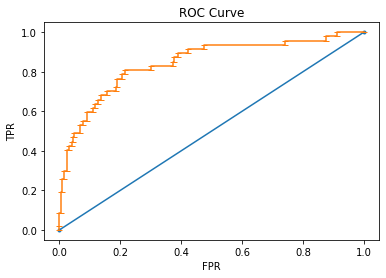

In [196]:
_=plt.plot(plt1_fpr,plt1_tpr,marker ='.')
_=plt.plot(plt_fpr,plt_tpr,marker ='_')
_=plt.title('ROC Curve')
_=plt.xlabel('FPR')
_=plt.ylabel('TPR')

** __I used Logistic Regression to solve the classification problem of identiifying the probability of employees getting attrition__